In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import ares
import beams
import healpy as hp

In [8]:
# get ARES global signal

sim = ares.simulations.Global21cm()
sim.run()
temp = sim.history['dTb']
frequencies = sim.history['nu']

# Loaded $ARES/input/inits/inits_planck_TTTEEE_lowl_lowE_best.txt.

##############################################################################################################
####                                      ARES Simulation: Overview                                       ####
##############################################################################################################
#### ---------------------------------------------------------------------------------------------------- ####
#### Source Populations                                                                                   ####
#### ---------------------------------------------------------------------------------------------------- ####
####               sfrd      sed    radio    O/IR    Ly-a     LW     Ly-C   X-ray    RTE                  ####
#### pop #0  :    fcoll      yes                      x       x                                           ####
#### pop #1  : link:sfrd:0   yes            

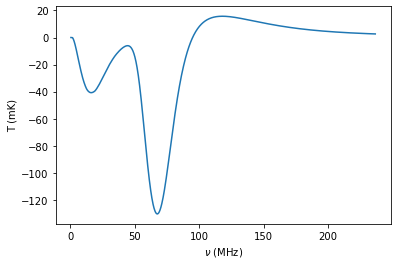

In [9]:
from matplotlib import pyplot as plt
plt.figure(); plt.plot(frequencies, temp); plt.xlabel(r'$\nu$ (MHz)'); plt.ylabel('T (mK)'); plt.show()

In [10]:
import glob
filename_list = glob.glob("hera_vivaldi_conductors_only/test_dir/" + "*.txt")
print(len(filename_list))

3


In [ ]:
# in healpix coordinates since convert_to_healpix = True
beam = beams.convert_amp_phase_txt_to_uvbeam("hera_vivaldi_conductors_only/test_dir/",
                                             beam_type="efield",
                                             telescope_name="EIGSEP",
                                             feed_name="hera_vivaldi",
                                             feed_version="v0",
                                             model_name="hera_phaseii_conductors_only",
                                             model_version="v0",
                                             history="",
                                             feed_pol="x",
                                             rotate_pol=True,
                                             x_orientation="north",
                                             efield_to_power=True,
                                             convert_to_healpix=True,
                                             nside=64,
                                             save=False,
                                             output_file=None,
                                             clobber=False,
                                             interpolation_function='az_za_simple',
                                             funits='GHz')

In [ ]:
def temp2intensity(temperature, frequencies):
    """
    Use Rayleigh-Jeans. Assumes T in mK and nu in MHz.
    """
    # SI units
    c = 3e8
    k = 1.38e-23
    
    f_Hz = frequencies * 1e6
    t_K = temperature/1e3
    
    I = 2*k/c**2 * f_Hz**2 * t_K
    I *= 1e26  # convert to Jy/Sr
    return I

In [ ]:
intensity_global = temp2intensity(temp, frequencies)

In [ ]:
def intensity_healpix(healpix_array, intensity):
    return

In [ ]:
def compute_visibilities(intensity_21cm, beam):
    # return integral of the product